<a href="https://colab.research.google.com/github/EPRADDH/NLP_Natural_Language_Processing_Methods/blob/main/CBOW_Word2Vec_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word2vec 
word2vwc is basically a word embedding technique that is used to convert the words in the dataset to vectors so that the machine understands. Each unique word in your data is assigned to a vector and these vectors vary in dimensions depending on the length of the word.

This model was created by Google in 2013 and is a predictive deep learning based model to compute and generate high quality, distributed and continuous dense vector representations of words, which capture contextual and semantic similarity

t is a shallow two-layered neural network.where there is input one hidden layer and output.

difference between shallow and deep neural network:

The shallow neural network consists of the only a hidden layer between input and output whereas deep neural network contains multiple hidden layers between input and output. Input is subjected to nodes whereas the hidden layer, as well as the output layer, contains neurons.

words2vec know as neural word embedding it has 200 -400 dimensions.

#Word2VecCustomModel

In [ ]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[================================================--] 97.1% 1614.2/1662.8MB downloaded


In [ ]:
for i, word in enumerate(wv.vocab):
    if i == 10:
        break
    print(word)

</s>
in
for
that
is
on
##
The
with
said


In [ ]:

vec_king = wv['king']
print(vec_king)

[ 1.25976562e-01  2.97851562e-02  8.60595703e-03  1.39648438e-01
 -2.56347656e-02 -3.61328125e-02  1.11816406e-01 -1.98242188e-01
  5.12695312e-02  3.63281250e-01 -2.42187500e-01 -3.02734375e-01
 -1.77734375e-01 -2.49023438e-02 -1.67968750e-01 -1.69921875e-01
  3.46679688e-02  5.21850586e-03  4.63867188e-02  1.28906250e-01
  1.36718750e-01  1.12792969e-01  5.95703125e-02  1.36718750e-01
  1.01074219e-01 -1.76757812e-01 -2.51953125e-01  5.98144531e-02
  3.41796875e-01 -3.11279297e-02  1.04492188e-01  6.17675781e-02
  1.24511719e-01  4.00390625e-01 -3.22265625e-01  8.39843750e-02
  3.90625000e-02  5.85937500e-03  7.03125000e-02  1.72851562e-01
  1.38671875e-01 -2.31445312e-01  2.83203125e-01  1.42578125e-01
  3.41796875e-01 -2.39257812e-02 -1.09863281e-01  3.32031250e-02
 -5.46875000e-02  1.53198242e-02 -1.62109375e-01  1.58203125e-01
 -2.59765625e-01  2.01416016e-02 -1.63085938e-01  1.35803223e-03
 -1.44531250e-01 -5.68847656e-02  4.29687500e-02 -2.46582031e-02
  1.85546875e-01  4.47265

In [ ]:
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))

'car'	'minivan'	0.69
'car'	'bicycle'	0.54
'car'	'airplane'	0.42
'car'	'cereal'	0.14
'car'	'communism'	0.06


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
print(wv.most_similar(positive=['car', 'minivan'], topn=5))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('SUV', 0.853219211101532), ('vehicle', 0.8175784349441528), ('pickup_truck', 0.7763689160346985), ('Jeep', 0.7567334175109863), ('Ford_Explorer', 0.756571888923645)]


In [ ]:
print(wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

car


/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


The dataset is from Amazon Review Data (2018) https://nijianmo.github.io/amazon/index.html

In [ ]:
import json




In [ ]:
import collections
import math
import os
import random

In [ ]:
import os
import numpy as np
from six.moves import urllib
import tensorflow as tf

# Step 1: Download the data.
url = 'http://mattmahoney.net/dc/'

In [ ]:
def maybe_download(filename, expected_bytes):
  """Download a file if not present, and make sure it's the right size."""
  if not os.path.exists(filename):
    filename, _ = urllib.request.urlretrieve(url + filename, filename)
  statinfo = os.stat(filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified', filename)
  else:
    print(statinfo.st_size)
    raise Exception(
        'Failed to verify ' + filename + '. Can you get to it with a browser?')
  return filename

In [ ]:
filename = maybe_download('text8.zip', 31344016)

Found and verified text8.zip


In [ ]:
# Read the data into a list of strings.
import zipfile
def read_data(filename):
  """Extract the first file enclosed in a zip file as a list of words."""
  with zipfile.ZipFile(filename) as f:
    data = tf.compat.as_str(f.read(f.namelist()[0])).split()
  return data


In [ ]:
vocabulary = read_data(filename)
print('Data size', len(vocabulary))

Data size 17005207


In [ ]:
# Step 2: Build the dictionary and replace rare words with UNK token.
vocabulary_size = 50000

In [ ]:
def build_dataset(words, n_words):
  """Process raw inputs into a dataset."""
  count = [['UNK', -1]]
  count.extend(collections.Counter(words).most_common(n_words - 1))
  dictionary = dict()
  for word, _ in count:
    dictionary[word] = len(dictionary)
  data = list()
  unk_count = 0
  for word in words:
    if word in dictionary:
      index = dictionary[word]
    else:
      index = 0  # dictionary['UNK']
      unk_count += 1
    data.append(index)
  count[0][1] = unk_count
  reversed_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
  return data, count, dictionary, reversed_dictionary

In [ ]:
data, count, dictionary, reverse_dictionary = build_dataset(vocabulary,
                                                            vocabulary_size)

In [ ]:
print('Most common words (+UNK)', count[:5])
print('Sample data', data[:10], [reverse_dictionary[i] for i in data[:10]])

Most common words (+UNK) [['UNK', 418391], ('the', 1061396), ('of', 593677), ('and', 416629), ('one', 411764)]
Sample data [5234, 3081, 12, 6, 195, 2, 3134, 46, 59, 156] ['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against']


In [ ]:
data_index = 0

In [ ]:
# Step 3: Function to generate a training batch for the skip-gram model.
def generate_batch(batch_size, num_skips, skip_window):
  global data_index
  assert batch_size % num_skips == 0
  assert num_skips <= 2 * skip_window
  batch = np.ndarray(shape=(batch_size), dtype=np.int32)
  labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
  span = 2 * skip_window + 1  # [ skip_window target skip_window ]
  buffer = collections.deque(maxlen=span)
  for _ in range(span):
    buffer.append(data[data_index])
    data_index = (data_index + 1) % len(data)
  for i in range(batch_size // num_skips):
    target = skip_window  # target label at the center of the buffer
    targets_to_avoid = [skip_window]
    for j in range(num_skips):
      while target in targets_to_avoid:
        target = random.randint(0, span - 1)
      targets_to_avoid.append(target)
      batch[i * num_skips + j] = buffer[skip_window]
      labels[i * num_skips + j, 0] = buffer[target]
    buffer.append(data[data_index])
    data_index = (data_index + 1) % len(data)
  # Backtrack a little bit to avoid skipping words in the end of a batch
  data_index = (data_index + len(data) - span) % len(data)
  return batch, labels


In [ ]:
batch, labels = generate_batch(batch_size=8, num_skips=2, skip_window=1)
for i in range(8):
  print(batch[i], reverse_dictionary[batch[i]],
        '->', labels[i, 0], reverse_dictionary[labels[i, 0]])

3081 originated -> 12 as
3081 originated -> 5234 anarchism
12 as -> 6 a
12 as -> 3081 originated
6 a -> 195 term
6 a -> 12 as
195 term -> 2 of
195 term -> 6 a


# [Continuous Bag of Words (CBOW) Model](https://thinkinfi.com/continuous-bag-of-words-cbow-single-word-model-how-it-works/)

The CBOW model architecture tries to predict the current target word (the center word) based on the source context words (surrounding words).

Considering a simple sentence, “the quick brown fox jumps over the lazy dog”, 

this can be pairs of (context_window, target_word) where if we consider a context window of size 2, 

we have examples like ([quick, fox], brown), ([the, brown], quick), ([the, dog], lazy) and so on.

In the CBOW model, the distributed representations of context (or surrounding words) are combined to predict the word in the middle. While in the Skip-gram model, the distributed representation of the input word is used to predict the context.

The Continuous Bag-of-Words model (CBOW) is frequently used in NLP deep learning. It is a model that tries to predict words given the context of a few words before and a few words after the target word

Typcially, CBOW is used to quickly train word embeddings, and these embeddings are used to initialize the embeddings of some more complicated model. Usually, this is referred to as pretraining embeddings


The CBOW model is as follows. Given a target word wi and an N context window on each side, wi−1,…,wi−N and wi+1,…,wi+N, referring to all context words collectively as C, 



use robust frameworks which have the Word2Vec model like gensim, let’s try and implement this from scratch to gain some perspective on how things really work behind the scenes

# Build the corpus vocabulary
To start off, we will first build our corpus vocabulary where we extract out each unique word from our vocabulary and map a unique numeric identifier to it.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.preprocessing import text
from keras.utils import np_utils
from keras.preprocessing import sequence

from keras.preprocessing.text import text_to_word_sequence


In [ ]:
data=open('/content/drive/MyDrive/NLP-Natural-Language-Processing-Methods/corona.txt','r',encoding='cp1252')
norm_bible = [text for text in data if text.count(' ') >= 2]

In [ ]:
norm_bible

['The speed of transmission is an important point of difference between the two viruses. Influenza has a shorter median incubation period (the time from infection to appearance of symptoms) and a shorter serial interval (the time between successive cases) than COVID-19 virus. The serial interval for COVID-19 virus is estimated to be 5-6 days, while for influenza virus, the serial interval is 3 days. This means that influenza can spread faster than COVID-19. \n',
 'Further, transmission in the first 3-5 days of illness, or potentially pre-symptomatic transmission –transmission of the virus before the appearance of symptoms – is a major driver of transmission for influenza. In contrast, while we are learning that there are people who can shed COVID-19 virus 24-48 hours prior to symptom onset, at present, this does not appear to be a major driver of transmission. \n',
 'The reproductive number – the number of secondary infections generated from one infected individual – is understood to b

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(norm_bible)
word2id = tokenizer.word_index

In [ ]:
word2id

{'19': 5,
 '2': 37,
 '24': 72,
 '3': 29,
 '48': 73,
 '5': 19,
 '6': 52,
 'a': 11,
 'an': 39,
 'and': 12,
 'appear': 82,
 'appearance': 26,
 'are': 22,
 'at': 78,
 'be': 18,
 'before': 64,
 'between': 13,
 'both': 94,
 'can': 32,
 'cases': 50,
 'comparisons': 100,
 'context': 96,
 'contrast': 65,
 'covid': 4,
 'days': 20,
 'difference': 42,
 'difficult': 102,
 'direct': 99,
 'does': 80,
 'driver': 35,
 'estimated': 51,
 'estimates': 93,
 'faster': 55,
 'first': 57,
 'for': 7,
 'from': 25,
 'further': 56,
 'generated': 86,
 'has': 44,
 'higher': 91,
 'hours': 74,
 'however': 92,
 'illness': 58,
 'important': 40,
 'in': 33,
 'incubation': 46,
 'individual': 89,
 'infected': 88,
 'infection': 48,
 'infections': 85,
 'influenza': 3,
 'interval': 16,
 'is': 9,
 'learning': 67,
 'major': 34,
 'making': 98,
 'means': 53,
 'median': 45,
 'more': 101,
 'not': 81,
 'number': 36,
 'of': 2,
 'one': 87,
 'onset': 77,
 'or': 59,
 'people': 69,
 'period': 47,
 'point': 41,
 'potentially': 60,
 'pre': 

In [ ]:
# build vocabulary of unique words
word2id['PAD'] = 0
id2word = {v:k for k, v in word2id.items()}
wids = [[word2id[w] for w in text_to_word_sequence(doc)] for doc in norm_bible]

In [ ]:
id2word

{0: 'PAD',
 1: 'the',
 2: 'of',
 3: 'influenza',
 4: 'covid',
 5: '19',
 6: 'virus',
 7: 'for',
 8: 'transmission',
 9: 'is',
 10: 'to',
 11: 'a',
 12: 'and',
 13: 'between',
 14: 'time',
 15: 'serial',
 16: 'interval',
 17: 'than',
 18: 'be',
 19: '5',
 20: 'days',
 21: '–',
 22: 'are',
 23: 'viruses',
 24: 'shorter',
 25: 'from',
 26: 'appearance',
 27: 'symptoms',
 28: 'while',
 29: '3',
 30: 'this',
 31: 'that',
 32: 'can',
 33: 'in',
 34: 'major',
 35: 'driver',
 36: 'number',
 37: '2',
 38: 'speed',
 39: 'an',
 40: 'important',
 41: 'point',
 42: 'difference',
 43: 'two',
 44: 'has',
 45: 'median',
 46: 'incubation',
 47: 'period',
 48: 'infection',
 49: 'successive',
 50: 'cases',
 51: 'estimated',
 52: '6',
 53: 'means',
 54: 'spread',
 55: 'faster',
 56: 'further',
 57: 'first',
 58: 'illness',
 59: 'or',
 60: 'potentially',
 61: 'pre',
 62: 'symptomatic',
 63: '–transmission',
 64: 'before',
 65: 'contrast',
 66: 'we',
 67: 'learning',
 68: 'there',
 69: 'people',
 70: 'who',

In [ ]:
wids

[[1,
  38,
  2,
  8,
  9,
  39,
  40,
  41,
  2,
  42,
  13,
  1,
  43,
  23,
  3,
  44,
  11,
  24,
  45,
  46,
  47,
  1,
  14,
  25,
  48,
  10,
  26,
  2,
  27,
  12,
  11,
  24,
  15,
  16,
  1,
  14,
  13,
  49,
  50,
  17,
  4,
  5,
  6,
  1,
  15,
  16,
  7,
  4,
  5,
  6,
  9,
  51,
  10,
  18,
  19,
  52,
  20,
  28,
  7,
  3,
  6,
  1,
  15,
  16,
  9,
  29,
  20,
  30,
  53,
  31,
  3,
  32,
  54,
  55,
  17,
  4,
  5],
 [56,
  8,
  33,
  1,
  57,
  29,
  19,
  20,
  2,
  58,
  59,
  60,
  61,
  62,
  8,
  63,
  2,
  1,
  6,
  64,
  1,
  26,
  2,
  27,
  21,
  9,
  11,
  34,
  35,
  2,
  8,
  7,
  3,
  33,
  65,
  28,
  66,
  22,
  67,
  31,
  68,
  22,
  69,
  70,
  32,
  71,
  4,
  5,
  6,
  72,
  73,
  74,
  75,
  10,
  76,
  77,
  78,
  79,
  30,
  80,
  81,
  82,
  10,
  18,
  11,
  34,
  35,
  2,
  8],
 [1,
  83,
  36,
  21,
  1,
  36,
  2,
  84,
  85,
  86,
  25,
  87,
  88,
  89,
  21,
  9,
  90,
  10,
  18,
  13,
  37,
  12,
  37,
  19,
  7,
  4,
  5,
  6,
  91,
  

In [ ]:
vocab_size = len(word2id)
embed_size = 100
window_size = 2 # context window size

In [ ]:
print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

Vocabulary Size: 103
Vocabulary Sample: [('the', 1), ('of', 2), ('influenza', 3), ('covid', 4), ('19', 5), ('virus', 6), ('for', 7), ('transmission', 8), ('is', 9), ('to', 10)]


#Build a CBOW (context, target) generator

In [ ]:
def generate_context_word_pairs(corpus, window_size, vocab_size):
    context_length = window_size*2
    for words in corpus:
        sentence_length = len(words)
        for index, word in enumerate(words):
            context_words = []
            label_word   = []            
            start = index - window_size
            end = index + window_size + 1
            
            context_words.append([words[i] 
                                 for i in range(start, end) 
                                 if 0 <= i < sentence_length 
                                 and i != index])
            label_word.append(word)

            x = sequence.pad_sequences(context_words, maxlen=context_length)
            y = np_utils.to_categorical(label_word, vocab_size)
            yield (x, y)
    



In [ ]:
import numpy as np

# Test this out for some samples
i = 0
for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
    if 0 not in x[0]:
        print('Context (X):', [id2word[w] for w in x[0]], '-> Target (Y):', id2word[np.argwhere(y[0])[0][0]])
    
        if i == 10:
            break
        i += 1

Context (X): ['the', 'speed', 'transmission', 'is'] -> Target (Y): of
Context (X): ['speed', 'of', 'is', 'an'] -> Target (Y): transmission
Context (X): ['of', 'transmission', 'an', 'important'] -> Target (Y): is
Context (X): ['transmission', 'is', 'important', 'point'] -> Target (Y): an
Context (X): ['is', 'an', 'point', 'of'] -> Target (Y): important
Context (X): ['an', 'important', 'of', 'difference'] -> Target (Y): point
Context (X): ['important', 'point', 'difference', 'between'] -> Target (Y): of
Context (X): ['point', 'of', 'between', 'the'] -> Target (Y): difference
Context (X): ['of', 'difference', 'the', 'two'] -> Target (Y): between
Context (X): ['difference', 'between', 'two', 'viruses'] -> Target (Y): the
Context (X): ['between', 'the', 'viruses', 'influenza'] -> Target (Y): two


In [ ]:
x

array([[13,  1, 23,  3]], dtype=int32)

#Build the CBOW model architecture

In [ ]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

# build CBOW architecture
cbow = Sequential()
cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size*2))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
cbow.add(Dense(vocab_size, activation='softmax'))
cbow.compile(loss='categorical_crossentropy', optimizer='rmsprop')

In [ ]:
# view model summary
print(cbow.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 100)            10300     
_________________________________________________________________
lambda (Lambda)              (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 103)               10403     
Total params: 20,703
Trainable params: 20,703
Non-trainable params: 0
_________________________________________________________________
None


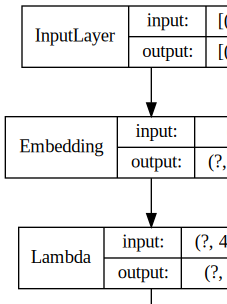

In [ ]:
# visualize model structure
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(cbow, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

#Train the Model

In [ ]:
for epoch in range(1, 10):
    loss = 0.
    i = 0
    for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
        i += 1
        loss += cbow.train_on_batch(x, y)
        if i % 100000 == 0:

          print('Processed {} (context, word) pairs'.format(i))

    print('Epoch:', epoch, '\tLoss:', loss)
    print()

Epoch: 1 	Loss: 916.7771601676941

Epoch: 2 	Loss: 901.1807432174683

Epoch: 3 	Loss: 882.9983923435211

Epoch: 4 	Loss: 861.1319408416748

Epoch: 5 	Loss: 837.3939559459686

Epoch: 6 	Loss: 814.7423787117004

Epoch: 7 	Loss: 794.7205078601837

Epoch: 8 	Loss: 776.9589866399765

Epoch: 9 	Loss: 760.457451581955



# Get Word Embeddings

To get word embeddings for our entire vocabulary, we can extract out the same from our embedding layer by leveraging the following code. We don’t take the embedding at position 0 since it belongs to the padding (PAD) term which is not really a word of interest.

In [ ]:
import pandas as pd

weights = cbow.get_weights()[0]
weights = weights[1:]
print(weights.shape)

pd.DataFrame(weights, index=list(id2word.values())[1:]).head()


(102, 100)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
of,0.112062,-0.047218,-0.113946,0.209475,0.269026,-0.077178,-0.038582,-0.111159,0.100456,-0.241625,-0.008675,-0.195672,-0.106372,0.029449,-0.153155,-0.014730,0.126183,-0.211955,0.038290,-0.005403,-0.065005,0.256485,-0.029725,0.125112,0.154758,0.124861,0.156184,-0.101601,-0.014551,0.045208,-0.111648,0.091469,0.022983,0.018230,-0.145927,-0.037400,0.006920,0.068704,0.020458,-0.014327,...,0.183808,0.012241,-0.143014,-0.170598,0.064328,0.048416,-0.325232,0.069201,-0.187607,0.027784,0.024834,0.222582,-0.117190,0.072456,-0.173758,-0.010142,0.057604,-0.068918,0.065478,0.091933,0.072361,-0.176073,-0.322837,0.064980,0.022783,-0.045285,0.240385,0.125138,0.038820,0.172238,0.011889,0.159918,-0.162952,0.133516,-0.070316,-0.102483,-0.107778,0.038140,0.094940,0.133823
influenza,0.119051,-0.034225,-0.114564,-0.218726,0.220310,-0.096452,-0.026509,0.104066,0.137327,-0.156783,-0.009947,-0.002178,0.141789,-0.102039,-0.080870,-0.241272,0.045098,0.004000,-0.005138,-0.269697,-0.053071,-0.210913,-0.041700,0.011692,0.121624,0.084441,0.072778,-0.319435,0.059725,0.013999,0.059608,-0.009320,0.131085,-0.213301,-0.036188,-0.038280,0.025918,0.119472,-0.030240,-0.155014,...,-0.085534,-0.157936,-0.064010,0.231003,0.001815,-0.129234,-0.062647,-0.075812,0.206643,0.017884,0.070241,0.148228,0.049549,0.092701,-0.056164,-0.049719,0.050651,-0.077099,0.089274,-0.014415,-0.123252,-0.024002,0.069416,0.012116,0.136527,0.045648,-0.113655,-0.032994,0.021036,0.027721,0.024262,-0.145594,0.083222,0.074049,0.053823,0.015658,-0.083082,0.314615,-0.073180,0.034965
covid,-0.061828,0.112045,-0.022188,-0.055370,0.116595,0.001476,-0.073494,0.070374,-0.194650,0.072400,0.019873,-0.041489,0.011938,-0.101422,-0.073957,-0.104975,0.002469,-0.052784,-0.150773,0.028617,0.064659,0.018168,-0.108262,-0.070047,0.054628,0.049606,0.019609,0.215314,0.116572,0.118349,0.051473,0.083614,0.074166,0.028119,-0.073903,-0.104330,0.157401,0.057625,-0.077917,-0.000878,...,-0.036996,-0.142865,-0.054206,0.096568,-0.122085,0.075317,0.022153,-0.024870,0.011049,0.103524,-0.081706,-0.040577,0.194434,0.000625,0.060181,-0.108825,-0.072592,-0.107556,0.131894,-0.089392,0.017899,-0.073382,-0.117550,-0.120043,-0.021395,-0.154074,-0.154050,0.002622,-0.014315,0.151098,0.058650,0.056378,0.033518,-0.033823,0.045372,-0.174040,-0.069892,0.017427,-0.090405,0.027957
19,0.192891,0.151063,-0.245152,0.080008,0.232050,-0.069970,-0.197555,-0.282972,-0.007938,0.089446,0.227578,-0.077005,0.081593,-0.349372,-0.127501,-0.068333,-0.133049,-0.018811,0.099768,-0.216592,-0.042711,0.211243,0.077070,-0.271613,0.115267,-0.109612,-0.001717,0.247629,0.190257,0.275107,-0.216127,-0.070994,-0.093697,0.214013,-0.116979,-0.012601,-0.112563,0.076699,0.025365,-0.245795,...,0.084272,-0.154540,0.235247,0.204614,-0.276276,0.212488,-0.145338,0.254858,-0.168586,-0.126773,0.189597,-0.099073,0.117837,-0.214199,-0.068141,-0.057593,-0.052636,-0.281147,-0.001224,0.118177,-0.220656,-0.221897,0.092753,-0.022399,-0.216110,-0.331790,-0.182279,-0.146344,0.116650,0.000485,0.161600,0.074467,0.067485,0.291568,-0.095380,-0.184805,-0.067623,-0.114364,-0.255627,-0.159847
virus,-0.015558,0.216286,-0.107263,-0.007987,0.037643,0.040900,-0.197752,-0.307170,0.076825,0.126949,0.166177,-0.251641,0.253372,-0.311635,-0.348639,-0.134607,0.151609,0.230544,-0.041744,-0.165532,0.056047,-0.019456,0.021712,0.143823,0.200389,-0.188323,0.167920,0.131973,-0.049267,0.112399,-0.284573,-0.019214,-0.107574,0.180062,-0.088433,0.056366,-0.118209,0.200650,0.205804,-0.144054,...,0.099328,-0.038302,0.158704,0.105680,-0.268480,-0.141596,-0.038366,0.195109,-0.076811,-0.057677,-0.237602,-0.080625,0.275230,-0.313964,0.228361,0.007577,0.216850,-0.223790,0.246008,0.131190,-0.098962,-0.189890,0.122458,-0.222174,0.010485,-0.309248,-0.277118,-0.164897,0.033664,0.130767,-0.23245

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

# compute pairwise distance matrix
distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)

# view contextually similar words
similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:5]+1] 
                   for search_term in ['illness','transmission', 'is', 'important', 'point']}

similar_words

(102, 102)


{'illness': ['pre', 'means', 'or', 'infections'],
 'important': ['an', 'point', 'infections', 'estimated'],
 'is': ['understood', 'appearance', 'appear', 'estimated'],
 'point': ['important', 'infections', 'secondary', 'an'],
 'transmission': ['–transmission', 'major', 'speed', 'in']}

# CBOW_word2vec_keras_example: 2

In [ ]:
import numpy as np
np.random.seed(13)

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda
from keras.utils.data_utils import get_file
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

import gensim

In [ ]:
path = get_file('alice.txt', origin='http://www.gutenberg.org/files/11/11-0.txt')
corpus = open(path).readlines()[:300]

180224/174693 [==============================] - 0s 2us/step


In [ ]:
corpus = [sentence for sentence in corpus if sentence.count(' ') >= 2]


# Tokenization then Transforms each text in texts to a sequence of integers

texts_to_sequences. Transforms each text in texts to a sequence of integers. Only top num_words-1 most frequent words will be taken into account. Only words known by the tokenizer will be taken into account.

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
corpus = tokenizer.texts_to_sequences(corpus)

In [ ]:
nb_samples = sum(len(s) for s in corpus) # no. of word samples in corpus
V = len(tokenizer.word_index) + 1  # tokenizer.word_index:dictionary of words and their uniquely assigned integers. V: vocab size

In [ ]:
dim = 100   # embedding size
window_size = 2  # context window size

In [ ]:
def generate_data(corpus, window_size, V):
    maxlen = window_size*2
    for words in corpus:
        L = len(words)
        for index, word in enumerate(words):
            contexts = []
            labels   = []            
            s = index - window_size
            e = index + window_size + 1
            
            contexts.append([words[i] for i in range(s, e) if 0 <= i < L and i != index])
            labels.append(word)

            x = sequence.pad_sequences(contexts, maxlen=maxlen)
            y = np_utils.to_categorical(labels, V)
            yield (x, y)

In [ ]:
# Creating a reverse dictionary(sequence_to_text in keras)
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))

In [ ]:
import numpy as np

# Test this out for some samples
i = 0
for x, y in generate_context_word_pairs(corpus=corpus, window_size=window_size, vocab_size=V):
    if 0 not in x[0]:
        print('Context (X):', [reverse_word_map[w] for w in x[0]], '-> Target (Y):', reverse_word_map[np.argwhere(y[0])[0][0]])
    
        if i == 10:
            break
        i += 1

Context (X): ['\ufeffthe', 'project', 'ebook', 'of'] -> Target (Y): gutenberg
Context (X): ['project', 'gutenberg', 'of', 'alice’s'] -> Target (Y): ebook
Context (X): ['gutenberg', 'ebook', 'alice’s', 'adventures'] -> Target (Y): of
Context (X): ['ebook', 'of', 'adventures', 'in'] -> Target (Y): alice’s
Context (X): ['of', 'alice’s', 'in', 'wonderland'] -> Target (Y): adventures
Context (X): ['alice’s', 'adventures', 'wonderland', 'by'] -> Target (Y): in
Context (X): ['adventures', 'in', 'by', 'lewis'] -> Target (Y): wonderland
Context (X): ['in', 'wonderland', 'lewis', 'carroll'] -> Target (Y): by
Context (X): ['this', 'ebook', 'for', 'the'] -> Target (Y): is
Context (X): ['ebook', 'is', 'the', 'use'] -> Target (Y): for
Context (X): ['is', 'for', 'use', 'of'] -> Target (Y): the


In [ ]:
x

array([[61, 17, 62,  8]], dtype=int32)

build CBOW Model

In [ ]:
cbow = Sequential()
cbow.add(Embedding(input_dim=V, output_dim=dim, input_length=window_size*2))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(dim,)))
cbow.add(Dense(V, activation='softmax'))

In [ ]:
cbow.compile(loss='categorical_crossentropy', optimizer='adadelta')

In [ ]:
for ite in range(10):
    loss = 0.
    for x, y in generate_data(corpus, window_size, V):
        loss += cbow.train_on_batch(x, y)

    #print(ite, loss)
    print('Epoch:', ite, '\tLoss:', loss)

Epoch: 0 	Loss: 17477.16960287094
Epoch: 1 	Loss: 17474.020650863647
Epoch: 2 	Loss: 17470.8741645813
Epoch: 3 	Loss: 17467.73010778427
Epoch: 4 	Loss: 17464.588492393494
Epoch: 5 	Loss: 17461.449332237244
Epoch: 6 	Loss: 17458.312631607056
Epoch: 7 	Loss: 17455.17835521698
Epoch: 8 	Loss: 17452.046567440033
Epoch: 9 	Loss: 17448.917232513428


In [ ]:
f = open('vectors.txt' ,'w')
f.write('{} {}\n'.format(V-1, dim))

8

In [ ]:
vectors = cbow.get_weights()[0]
for word, i in tokenizer.word_index.items():
    str_vec = ' '.join(map(str, list(vectors[i, :])))
    f.write('{} {}\n'.format(word, str_vec))
f.close()

In [ ]:
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)

In [ ]:
w2v.most_similar(positive=['the'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('shutting', 0.3209899961948395),
 ('give', 0.26713377237319946),
 ('actually', 0.2627982199192047),
 ('house', 0.2582211494445801),
 ('jumped', 0.2550831735134125),
 ('\ufeffthe', 0.24545744061470032),
 ('ears', 0.2348078191280365),
 ('without', 0.23361985385417938),
 ('flame', 0.22705873847007751),
 ('bye', 0.22394752502441406)]

In [ ]:

w2v.most_similar(positive=['alice'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('written', 0.2921648621559143),
 ('11', 0.2904602289199829),
 ('along', 0.27751296758651733),
 ('world', 0.266973078250885),
 ('lying', 0.2651062309741974),
 ('itself', 0.25291574001312256),
 ('nonsense', 0.251752644777298),
 ('passage', 0.24955332279205322),
 ('lobster', 0.24495452642440796),
 ('where', 0.24381212890148163)]

In [ ]:
w2v.most_similar(positive=['written'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ground', 0.3064327836036682),
 ('underneath', 0.29750150442123413),
 ('alice', 0.2921648621559143),
 ('knew', 0.2712549567222595),
 ('where', 0.2450907826423645),
 ('remained', 0.2410314679145813),
 ('online', 0.23091895878314972),
 ('beds', 0.22779256105422974),
 ('made', 0.21763600409030914),
 ('author', 0.2154083102941513)]

# CBOW_word2vec_pytorch_example: 2

In [ ]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

In [ ]:
CONTEXT_SIZE = 2  # 2 words to the left, 2 to the right

In [ ]:
raw_text = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells.""".split()

In [ ]:
# By deriving a set from `raw_text`, we deduplicate the array
vocab = set(raw_text)
vocab_size = len(vocab)

In [ ]:
word_to_idx = {word: i for i, word in enumerate(vocab)}
idx_to_word = {i: word for i, word in enumerate(vocab)}

In [ ]:
word_to_ix = {word: i for i, word in enumerate(vocab)}
word_to_ix

{'As': 46,
 'Computational': 10,
 'In': 35,
 'People': 34,
 'The': 9,
 'We': 8,
 'a': 5,
 'about': 24,
 'abstract': 42,
 'are': 21,
 'beings': 6,
 'by': 41,
 'called': 19,
 'computational': 37,
 'computer': 4,
 'computers.': 28,
 'conjure': 25,
 'create': 29,
 'data.': 7,
 'direct': 43,
 'directed': 3,
 'effect,': 1,
 'evolution': 13,
 'evolve,': 17,
 'idea': 32,
 'inhabit': 33,
 'is': 47,
 'manipulate': 18,
 'of': 36,
 'other': 16,
 'our': 26,
 'pattern': 15,
 'process': 14,
 'process.': 45,
 'processes': 23,
 'processes.': 27,
 'program.': 44,
 'programs': 11,
 'rules': 22,
 'spells.': 20,
 'spirits': 31,
 'study': 39,
 'that': 40,
 'the': 30,
 'they': 48,
 'things': 38,
 'to': 0,
 'we': 2,
 'with': 12}

In [ ]:
data = []
for i in range(2, len(raw_text) - 2):
    context = [raw_text[i - 2], raw_text[i - 1],
               raw_text[i + 1], raw_text[i + 2]]
    target = raw_text[i]
    data.append((context, target))
print(data[:5])

[(['We', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'a'], 'idea')]


In [ ]:
def make_context_vector(context, word_to_ix):
    idxs = [word_to_ix[w] for w in context]
    return torch.tensor(idxs, dtype=torch.long)

built CBOW model

In [ ]:
class CBOW(torch.nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(CBOW, self).__init__()

        #out: 1 x emdedding_dim
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(embedding_dim, 128)
        self.activation_function1 = nn.ReLU()
        
        #out: 1 x vocab_size
        self.linear2 = nn.Linear(128, vocab_size)
        self.activation_function2 = nn.LogSoftmax(dim = -1)
        

    def forward(self, inputs):
        embeds = sum(self.embeddings(inputs)).view(1,-1)
        out = self.linear1(embeds)
        out = self.activation_function1(out)
        out = self.linear2(out)
        out = self.activation_function2(out)
        return out

    def get_word_emdedding(self, word):
        word = torch.tensor([word_to_ix[word]])
        return self.embeddings(word).view(1,-1)

In [ ]:
EMDEDDING_DIM = 100
model = CBOW(vocab_size, EMDEDDING_DIM)

In [ ]:
losses = []
loss_function = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [ ]:
#TRAINING
for epoch in range(50):
    total_loss = 0

    for context, target in data:
        context_vector = make_context_vector(context, word_to_ix)  

        log_probs = model(context_vector)

        total_loss += loss_function(log_probs, torch.tensor([word_to_ix[target]]))

    #optimize at the end of each epoch
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()
    #total_loss += loss.item()
        
    losses.append(total_loss)

print(losses)

[tensor(20.4792, grad_fn=<AddBackward0>), tensor(19.6298, grad_fn=<AddBackward0>), tensor(18.8330, grad_fn=<AddBackward0>), tensor(18.0851, grad_fn=<AddBackward0>), tensor(17.3838, grad_fn=<AddBackward0>), tensor(16.7239, grad_fn=<AddBackward0>), tensor(16.1035, grad_fn=<AddBackward0>), tensor(15.5196, grad_fn=<AddBackward0>), tensor(14.9695, grad_fn=<AddBackward0>), tensor(14.4507, grad_fn=<AddBackward0>), tensor(13.9613, grad_fn=<AddBackward0>), tensor(13.4983, grad_fn=<AddBackward0>), tensor(13.0608, grad_fn=<AddBackward0>), tensor(12.6463, grad_fn=<AddBackward0>), tensor(12.2538, grad_fn=<AddBackward0>), tensor(11.8815, grad_fn=<AddBackward0>), tensor(11.5278, grad_fn=<AddBackward0>), tensor(11.1929, grad_fn=<AddBackward0>), tensor(10.8737, grad_fn=<AddBackward0>), tensor(10.5694, grad_fn=<AddBackward0>), tensor(10.2803, grad_fn=<AddBackward0>), tensor(10.0041, grad_fn=<AddBackward0>), tensor(9.7412, grad_fn=<AddBackward0>), tensor(9.4896, grad_fn=<AddBackward0>), tensor(9.2489, gr

In [ ]:
#TESTING
context = ['People','create','to', 'direct']
context_vector = make_context_vector(context, word_to_ix)
a = model(context_vector)

In [ ]:
#Print result
print(f'Raw text: {" ".join(raw_text)}\n')
print(f'Context: {context}\n')
print(f'Prediction: {idx_to_word[torch.argmax(a[0]).item()]}')

Raw text: We are about to study the idea of a computational process. Computational processes are abstract beings that inhabit computers. As they evolve, processes manipulate other abstract things called data. The evolution of a process is directed by a pattern of rules called a program. People create programs to direct processes. In effect, we conjure the spirits of the computer with our spells.

Context: ['People', 'create', 'to', 'direct']

Prediction: programs
